# Luke

In [3]:
import pandas as pd
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")

<AxesSubplot:xlabel='incident_date'>

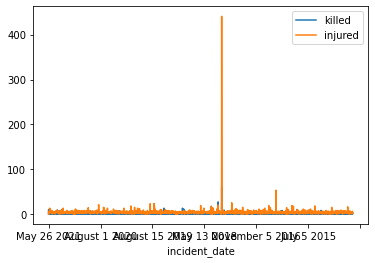

In [3]:
df.plot(x='incident_date', y=['killed','injured'])

Looking at a plot of killed and injured over incident_date shows multiple outliers with killed having a max of 59 and injured haveing a max of 441. These will have to be looked at and possibly removed. incident_date may also need to be simplified and split into years or months.

<AxesSubplot:xlabel='state', ylabel='killed'>

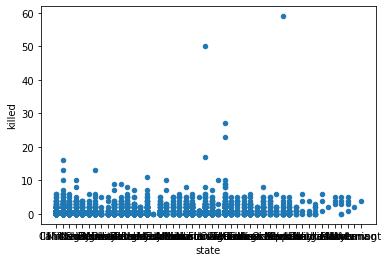

In [4]:
df.plot(kind='scatter', x='state', y='killed')

In [26]:
import pandas as pd
df = pd.read_csv("../data/raw/US_Gun_Violence_Data.csv")

df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


def clean_month(row):
    
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    month = [m for m in months if(m in row.incident_date)]
    return month[0]
    # Clean dataframe
    
def clean_year(row):
    
    years = ['2014','2015','2016','2017','2018','2019','2020','2021','2022'] 
    year = [y for y in years if(y in row.incident_date)]
    return int(year[0])
    # Clean dataframe
   
    
def clean_df(playlist):
    df_cleaned = df.copy()
    
    #split incident_date into two new columns named 'month' and 'year'
    #month column for more general info and for possible research question on violence per month
    #year column required for possible questions and to remove incomplete years
    df_cleaned['month'] = df_cleaned.apply(lambda row: clean_month(row), axis=1)
    df_cleaned['year'] = df_cleaned.apply(lambda row: clean_year(row), axis=1)
    df_cleaned = df_cleaned.drop(['incident_id','address','city_or_county','incident_date'], axis=1)
    
    #remove outliers
    df_cleaned = df_cleaned[df_cleaned['killed'] < 50]
    df_cleaned = df_cleaned[df_cleaned['injured'] < 50]
    df_cleaned = df_cleaned[df_cleaned['year'] < 2021]

    #rearrange columns
    df_cleaned = df_cleaned[['year','month','state','killed','injured']]
    return df_cleaned# Get df with reclassfied 'condition' column

df_cleaned = clean_df(df)


<AxesSubplot:xlabel='months'>

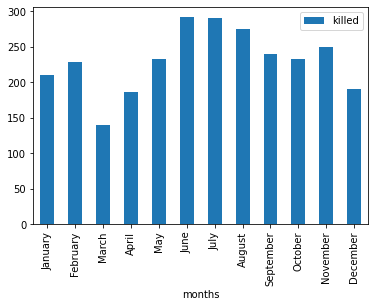

In [76]:
## df_january = df_cleaned[df_cleaned['month'] == 'January']
#df_february = df_cleaned[df_cleaned['month'] == 'February']
#df_march = df_cleaned[df_cleaned['month'] == 'March']
#df_april = df_cleaned[df_cleaned['month'] == 'April']
#df_may = df_cleaned[df_cleaned['month'] == 'May']
#df_june = df_cleaned[df_cleaned['month'] == 'June']
#df_july = df_cleaned[df_cleaned['month'] == 'July']
#df_august = df_cleaned[df_cleaned['month'] == 'August']
#df_september = df_cleaned[df_cleaned['month'] == 'September']
#df_october = df_cleaned[df_cleaned['month'] == 'October']
#df_november = df_cleaned[df_cleaned['month'] == 'November']
#df_december = df_cleaned[df_cleaned['month'] == 'December']

#df_months = [df_january, df_february, df_march, df_april, df_may, df_june, df_july, df_august, df_september, df_october, df_november, df_december]


def sum_month(df, col):

    months = ['January','February','March','April','May','June','July','August','September','October','November','December']

    df_mv = pd.DataFrame(months, columns=['months'])

    for m in months:
        df_mv.at[months.index(m), col] = df[df['month'] == m][col].sum()
    return df_mv
    
df_months = sum_month(df_cleaned, "killed")

df_months.plot(kind = 'bar', x = 'months', y = 'killed')



#prints the sum of a column
#print(df_months)

<AxesSubplot:xlabel='months'>

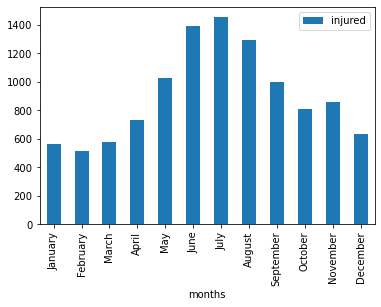

In [77]:
df_months = sum_month(df_cleaned, "injured")
df_months.plot(kind = 'bar', x = 'months', y = 'injured')

## Research question/interests

Briefly describe your research question or interests here.